# Intro Analysis

In [307]:
# Basic packages
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import pandas as pd
import math
import netCDF4 as nc

# DateTime packages
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta
import time
import matplotlib.dates as mdates

# Stats packages
import scipy
import bottleneck as bn
import PyCO2SYS as pyco2
import gsw
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import seaborn as sns

# Logistical packages
import requests
from importlib import reload
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText

In [2]:
%cd '/Users/akbaskind/Documents/Python Scripts/phyto'
%run PLT.py

/Users/akbaskind/Documents/Python Scripts/phyto


# Get Data

In [111]:
#The scope is always look like this so we did not need to change anything

import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials

scope = [
   'https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

# Name of our Service Account Key
google_key_file = 'servicecredentials.json'
credentials = ServiceAccountCredentials.from_json_keyfile_name(google_key_file, scope)
gc = gspread.authorize(credentials)

# Spreadsheet key
spreadsheet_key = '1uLRAvFDsTSfS-c45DiG-W6VMa8I1J7XD1O-pJA4fp10'

# Worksheet keys
wks_hydrocat620 = 'Hydrocat 620'
wks_hydrocat720 = 'Hydrocat 720'
wks_MV = 'MV'
wks_QP = 'QP'

#Opening the worksheet by using Worksheet ID
workbook = gc.open_by_key(spreadsheet_key)

## HYDROCAT 620
#Selecting which sheet to pulling the data
sheet = workbook.worksheet(wks_hydrocat620)
values = sheet.get_all_values()
hydrocat620 = pd.DataFrame(values[1:], columns = values[0])


## HYDROCAT 720
#Selecting which sheet to pulling the data
sheet = workbook.worksheet(wks_hydrocat720)
values = sheet.get_all_values()
hydrocat720 = pd.DataFrame(values[1:], columns = values[0])

## MV
#Selecting which sheet to pulling the data
sheet = workbook.worksheet(wks_MV)
values = sheet.get_all_values()
MV = pd.DataFrame(values[1:], columns = values[0])

## QP
#Selecting which sheet to pulling the data
sheet = workbook.worksheet(wks_QP)
values = sheet.get_all_values()
QP = pd.DataFrame(values[1:], columns = values[0])

In [112]:
for k in hydrocat620.keys():
    if k == 'DateTime' or k == 'time':
        hydrocat620[k] = pd.to_datetime(hydrocat620[k])
    else:
        hydrocat620[k] = pd.to_numeric(hydrocat620[k])

for k in hydrocat720.keys():
    if k == 'DateTime' or k == 'time':
        hydrocat720[k] = pd.to_datetime(hydrocat720[k])
    else:
        hydrocat720[k] = pd.to_numeric(hydrocat720[k])
        
for k in QP.keys():
    if k == 'DateTime' or k == 'time':
        QP[k] = pd.to_datetime(QP[k])
    else:
        QP[k] = pd.to_numeric(QP[k])
        
for k in MV.keys():
    if k == 'DateTime' or k == 'time':
        MV[k] = pd.to_datetime(MV[k])
    else:
        MV[k] = pd.to_numeric(MV[k])

In [5]:
labdf = PLT.get_lab_samples('https://docs.google.com/spreadsheets/d/17FFbtUuhUS4UtxB-OjKIP2wCYJoEAmaW6VaHQPcup9U/edit#gid=0.', 'Sheet1')

In [12]:
labGB = labdf.where(labdf['Location']== 'GB').dropna()
labPLT = labdf.where(labdf['Location']== 'PLT').dropna()
labGB = labGB.reset_index(drop=True)
labPLT = labPLT.reset_index(drop=True)

# Color formatting

In [6]:
pink = '#ff6289'
purple = '#C79FEF'
blue = '#82e9ff'
green = '#C1F80A'

# Greens
caribbean_green = '#00cc99'
emerald = '#319177'
crayola_green = '#1cac78'
jade = '#00a86b'
kelly = '#4cbb17'
yellowgreen = '#9acd32'

# Blues
french_sky_blue = '#77b5fe'
opal = '#a8c3bc'
baby_blue = '#89cff0'
tiffany_blue = '#0abab5'
cornflower = '#6495ed'

# Pinks
hollywood_cerise = '#f400a1'
baker_miller = '#ff91af'
wild_strawberry = '#ff43a4'

# Purples
iris = '#5a4fcf'
orchid = '#9932cc'
amethyst = '#9966cc'
wisteria = '#c9a0dc'

# Oranges
neon_carrot = '#ffa343'
gamboge = '#e49b0f'
carrot = '#ed9121'

# Yellows
sunglow = '#ffcc33'
bitter_lemon = '#cae00d'
pantone_yellow = '#fedf00'

# Reds
candy_apple = '#e2062c'
carmine = '#eb4c42'
coquelicot = '#ff3800'

In [7]:
clr_hydro620 = caribbean_green

clr_hydro720 = cornflower

clr_MV = baker_miller

clr_QP = pantone_yellow

clr_PLT = wisteria

clr_GB = neon_carrot

# Basic time series plot

In [13]:
labGB.keys()

Index(['Sample', 'DateTime', 'Location', 'depth', 'Salinity',
       'In Situ Temperature', 'DIC (umol/kg)', 'TA (umol/kg)', 'pH'],
      dtype='object')

Text(0, 0.5, 'pH')

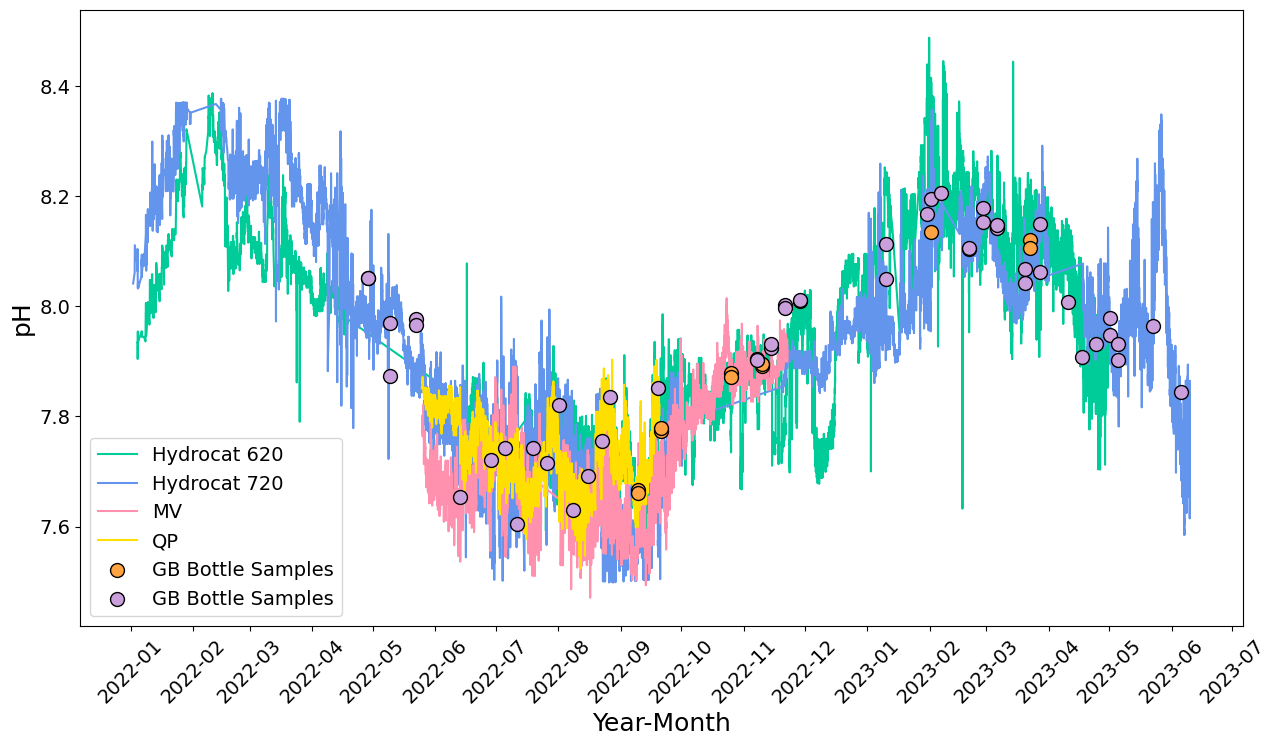

In [19]:
fig, ax = plt.subplots(figsize = [15,8])

df = hydrocat620
x = 'DateTime'
y = 'pH final'
ax.plot(df[x], df[y], color = clr_hydro620, label = 'Hydrocat 620')

df = hydrocat720
ax.plot(df[x], df[y], color = clr_hydro720, label = 'Hydrocat 720')

df = MV
ax.plot(df[x], df[y], color = clr_MV, label = 'MV')

df = QP
ax.plot(df[x], df[y], color = clr_QP, label = 'QP')

ax.scatter(labGB['DateTime'], labGB['pH'], facecolors = clr_GB, edgecolors = 'k',
           label = 'GB Bottle Samples', zorder = 3, s = 100)
ax.scatter(labPLT['DateTime'], labPLT['pH'], facecolors = clr_PLT, edgecolors = 'k',
           label = 'GB Bottle Samples', zorder = 3, s = 100)

ax.legend()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.tick_params('x',labelsize = 14, labelrotation = 45)
ax.tick_params('y',labelsize = 14)
ax.legend(fontsize = 14)
ax.set_xlabel('Year-Month', fontsize = 18)
ax.set_ylabel('pH', fontsize = 18)

# pH monthly averages
Basically, I just added another column that has the month (represented by a number).

In [129]:
hydrocat620['Month'] = np.zeros(len(hydrocat620['DateTime']))
hydrocat720['Month'] = np.zeros(len(hydrocat720['DateTime']))
MV['Month'] = np.zeros(len(MV['DateTime']))
QP['Month'] = np.zeros(len(QP['DateTime']))
for ind in hydrocat620.index:
    hydrocat620['Month'][ind] = hydrocat620['DateTime'][ind].month
for ind in hydrocat720.index:
    hydrocat720['Month'][ind] = hydrocat720['DateTime'][ind].month
for ind in MV.index:
    MV['Month'][ind] = MV['DateTime'][ind].month
for ind in QP.index:
    QP['Month'][ind] = QP['DateTime'][ind].month
MV

,DateTime,Temperature [degC],Salinity [PSU],DO [mg/L],raw pH [total],pH final,pH (normalized to 15°C),Month
0,2022-05-25 12:15:00,18.498,29.29,8.52,7.780182,7.780182,7.832411,5.0
1,2022-05-25 12:30:00,18.452,29.36,8.42,7.770350,7.770350,7.821772,5.0
2,2022-05-25 12:45:00,18.399,29.39,8.52,7.780484,7.780484,7.831264,5.0
3,2022-05-25 13:00:00,18.376,29.42,8.50,7.790562,7.790562,7.841136,5.0
4,2022-05-25 13:15:00,18.230,29.48,8.49,7.780906,7.780906,7.829201,5.0
...,...,...,...,...,...,...,...,...
16505,2022-11-22 10:30:00,8.814,29.99,9.09,7.908946,7.908946,7.810475,11.0
16506,2022-11-22 10:45:00,8.680,29.95,9.19,7.919123,7.919123,7.818272,11.0
16507,2022-11-22 11:00:00,8.646,29.94,9.21,7.919168,7.919168,7.817762,11.0
16508,2022-11-22 11:15:00,8.582,29.91,9.23,7.919234,7.919234,7.816785,11.0


In [321]:
for m in hydrocat720['Month'].unique():
    print(m)

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0


In [322]:
mn = {'Hydrocat 620': [], 'Hydrocat 720': [], 'QP': [], 'MV': []}
std = {'Hydrocat 620': [], 'Hydrocat 720': [], 'QP': [], 'MV': []}

# for each month in the dataset
# it loops through 1 through 12
for m in hydrocat720['Month'].unique():
    # take the mean of each data point with that month
    # and the standard deviation
    
    # Hydrocat 620
    M620 = hydrocat620.where(hydrocat620['Month']==m).dropna().mean()
    STD620 = hydrocat620.where(hydrocat620['Month']==m).dropna().std(ddof=1)
    
    # Hydrocat 720
    M720 = hydrocat720.where(hydrocat720['Month']==m).dropna().mean()
    STD720 = hydrocat720.where(hydrocat720['Month']==m).dropna().std(ddof=1)
    
    # MV
    Mmv = MV.where(MV['Month']==m).dropna().mean()
    STDmv = MV.where(MV['Month']==m).dropna().std(ddof=1)
    
    # QP
    Mqp = QP.where(QP['Month']==m).dropna().mean()
    STDqp = QP.where(QP['Month']==m).dropna().std(ddof=1)
    
    # Append all the values
    # It will start with Jan then go to Feb, March, etc.
    mn['Hydrocat 620'].append(M620['pH final'])
    mn['Hydrocat 720'].append(M720['pH final'])
    mn['QP'].append(Mqp['pH final'])
    mn['MV'].append(Mmv['pH final'])
    
    std['Hydrocat 620'].append(STD620['pH final'])
    std['Hydrocat 720'].append(STD720['pH final'])
    std['QP'].append(STDqp['pH final'])
    std['MV'].append(STDmv['pH final'])

In [37]:
pH_mn = pd.DataFrame(mn)
pH_std = pd.DataFrame(std)

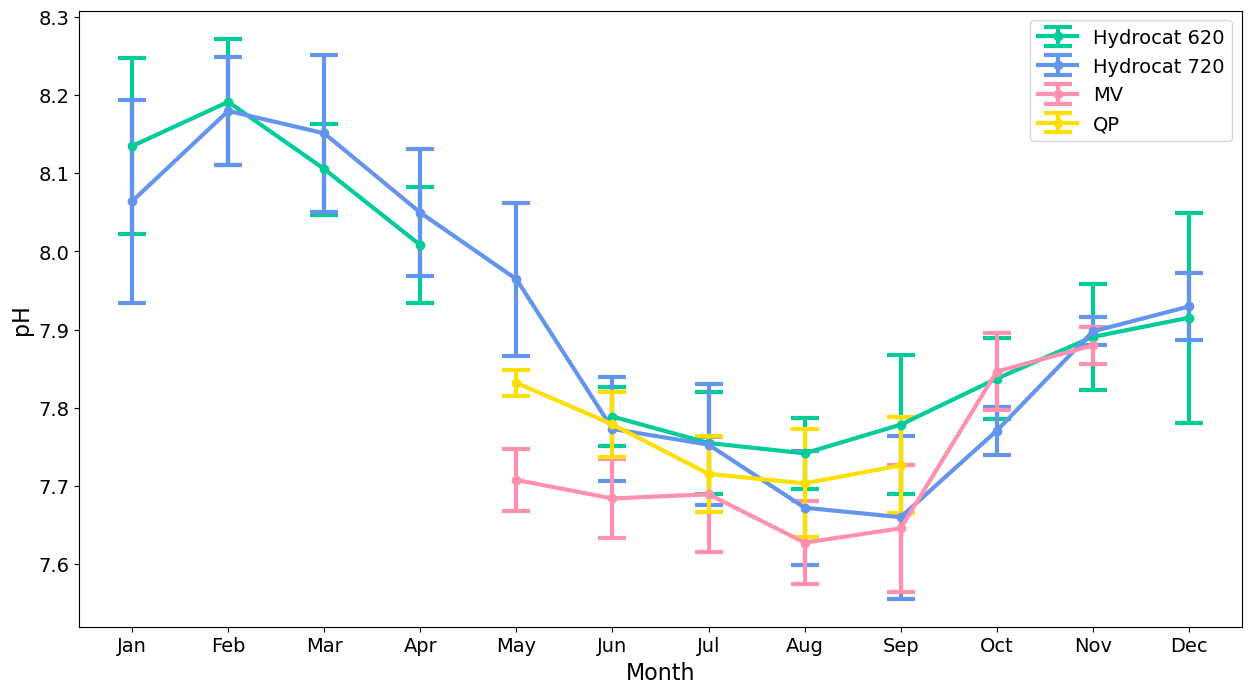

In [211]:
fig, ax = plt.subplots(figsize = [15,8])
months = np.arange(1,13,1)

d = 'Hydrocat 620'
ax.errorbar(months, pH_mn[d], yerr = pH_std[d], lw = 3,
           color = clr_hydro620, marker = 'o', capsize = 10, capthick = 3, label = d)

d = 'Hydrocat 720'
ax.errorbar(months, pH_mn[d], yerr = pH_std[d], lw = 3,
           color = clr_hydro720, marker = 'o', capsize = 10, capthick = 3, label = d)

d = 'MV'
ax.errorbar(months, pH_mn[d], yerr = pH_std[d], lw = 3,
           color = clr_MV, marker = 'o', capsize = 10, capthick = 3, label = d)

d = 'QP'
ax.errorbar(months, pH_mn[d], yerr = pH_std[d], lw = 3, 
           color = clr_QP, marker = 'o', capsize = 10, capthick = 3, label = d)

ax.set_xticks(months)
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontsize = 14)
ax.tick_params('y',labelsize = 14)
ax.set_ylabel('pH', fontsize = 16)
ax.set_xlabel('Month', fontsize = 16)
ax.legend(fontsize = 14)

fig.savefig('/Users/akbaskind/Documents/Python Scripts/phyto/monthly_ph.png', bbox_inches='tight')


In [256]:
pH_mn_s

,Hydrocat 620,Hydrocat 720,QP,MV
0,8.091956,8.056743,NaN,NaN
1,8.062095,8.052050,7.831756,7.707652
2,7.762386,7.731674,7.732856,7.664633
3,7.835461,7.727785,7.726347,7.782132


# pH seasonal average

In [323]:
# Creating new column that will contain the season
hydrocat620['Season'] = np.zeros(len(hydrocat620['Month']))
hydrocat720['Season'] = np.zeros(len(hydrocat720['Month']))
MV['Season'] = np.zeros(len(MV['Month']))
QP['Season'] = np.zeros(len(QP['Month']))

# Loop through by index
for ind in hydrocat620.index:
    # If Month is 12, 1, or 2 -- Dec, Jan, or Feb --> DJF/Winter
    if hydrocat620['Month'][ind] == 12 or hydrocat620['Month'][ind] == 1 or hydrocat620['Month'][ind] == 2:
        hydrocat620['Season'][ind] = 'DJF'
    # If Month is 3, 4, or 5 -- March, Apr, or May --> MAM/Spring
    elif hydrocat620['Month'][ind] == 3 or hydrocat620['Month'][ind] == 4 or hydrocat620['Month'][ind] == 5:
        hydrocat620['Season'][ind] = 'MAM'
    # If Month is 6, 7, or 8 -- Jun, Jul, or Aug --> JJA/Summer
    elif hydrocat620['Month'][ind] == 6 or hydrocat620['Month'][ind] == 7 or hydrocat620['Month'][ind] == 8:
        hydrocat620['Season'][ind] = 'JJA'
    # If Month is 9, 10, or 11 -- Sep, Oct, Nov --> SON/Autumn
    else:
        hydrocat620['Season'][ind] = 'SON'
        
for ind in hydrocat720.index:
    # If Month is 12, 1, or 2 -- Dec, Jan, or Feb --> DJF/Winter
    if hydrocat720['Month'][ind] == 12 or hydrocat720['Month'][ind] == 1 or hydrocat720['Month'][ind] == 2:
        hydrocat720['Season'][ind] = 'DJF'
    # If Month is 3, 4, or 5 -- March, Apr, or May --> MAM/Spring
    elif hydrocat720['Month'][ind] == 3 or hydrocat720['Month'][ind] == 4 or hydrocat720['Month'][ind] == 5:
        hydrocat720['Season'][ind] = 'MAM'
    # If Month is 6, 7, or 8 -- Jun, Jul, or Aug --> JJA/Summer
    elif hydrocat720['Month'][ind] == 6 or hydrocat720['Month'][ind] == 7 or hydrocat720['Month'][ind] == 8:
        hydrocat720['Season'][ind] = 'JJA'
    # If Month is 9, 10, or 11 -- Sep, Oct, Nov --> SON/Autumn
    else:
        hydrocat720['Season'][ind] = 'SON'
        
for ind in MV.index:
    # If Month is 12, 1, or 2 -- Dec, Jan, or Feb --> DJF/Winter
    if MV['Month'][ind] == 12 or MV['Month'][ind] == 1 or MV['Month'][ind] == 2:
        MV['Season'][ind] = 'DJF'
    # If Month is 3, 4, or 5 -- March, Apr, or May --> MAM/Spring
    elif MV['Month'][ind] == 3 or MV['Month'][ind] == 4 or MV['Month'][ind] == 5:
        MV['Season'][ind] = 'MAM'
    # If Month is 6, 7, or 8 -- Jun, Jul, or Aug --> JJA/Summer
    elif MV['Month'][ind] == 6 or MV['Month'][ind] == 7 or MV['Month'][ind] == 8:
        MV['Season'][ind] = 'JJA'
    # If Month is 9, 10, or 11 -- Sep, Oct, Nov --> SON/Autumn
    else:
        MV['Season'][ind] = 'SON'
        
for ind in QP.index:
    # If Month is 12, 1, or 2 -- Dec, Jan, or Feb --> DJF/Winter
    if QP['Month'][ind] == 12 or QP['Month'][ind] == 1 or QP['Month'][ind] == 2:
        QP['Season'][ind] = 'DJF'
    # If Month is 3, 4, or 5 -- March, Apr, or May --> MAM/Spring
    elif QP['Month'][ind] == 3 or QP['Month'][ind] == 4 or QP['Month'][ind] == 5:
        QP['Season'][ind] = 'MAM'
    # If Month is 6, 7, or 8 -- Jun, Jul, or Aug --> JJA/Summer
    elif QP['Month'][ind] == 6 or QP['Month'][ind] == 7 or QP['Month'][ind] == 8:
        QP['Season'][ind] = 'JJA'
    # If Month is 9, 10, or 11 -- Sep, Oct, Nov --> SON/Autumn
    else:
        QP['Season'][ind] = 'SON'
        

In [324]:
for m in hydrocat720['Season'].unique():
    print(m)

DJF
MAM
JJA
SON


In [63]:
mn_s = {'Hydrocat 620': [], 'Hydrocat 720': [], 'QP': [], 'MV': []}
std_s = {'Hydrocat 620': [], 'Hydrocat 720': [], 'QP': [], 'MV': []}

# Loops throgh DJF, MAM, JJA, SON (in that order)
for m in hydrocat720['Season'].unique():
    M620 = hydrocat620.where(hydrocat620['Season']==m).dropna().mean()
    STD620 = hydrocat620.where(hydrocat620['Season']==m).dropna().std(ddof=1)
    
    M720 = hydrocat720.where(hydrocat720['Season']==m).dropna().mean()
    STD720 = hydrocat720.where(hydrocat720['Season']==m).dropna().std(ddof=1)
    
    Mmv = MV.where(MV['Season']==m).dropna().mean()
    STDmv = MV.where(MV['Season']==m).dropna().std(ddof=1)
    
    Mqp = QP.where(QP['Season']==m).dropna().mean()
    STDqp = QP.where(QP['Season']==m).dropna().std(ddof=1)
    
    mn_s['Hydrocat 620'].append(M620['pH final'])
    mn_s['Hydrocat 720'].append(M720['pH final'])
    mn_s['QP'].append(Mqp['pH final'])
    mn_s['MV'].append(Mmv['pH final'])
    
    std_s['Hydrocat 620'].append(STD620['pH final'])
    std_s['Hydrocat 720'].append(STD720['pH final'])
    std_s['QP'].append(STDqp['pH final'])
    std_s['MV'].append(STDmv['pH final'])

In [64]:
pH_mn_s = pd.DataFrame(mn_s)
pH_std_s = pd.DataFrame(std_s)

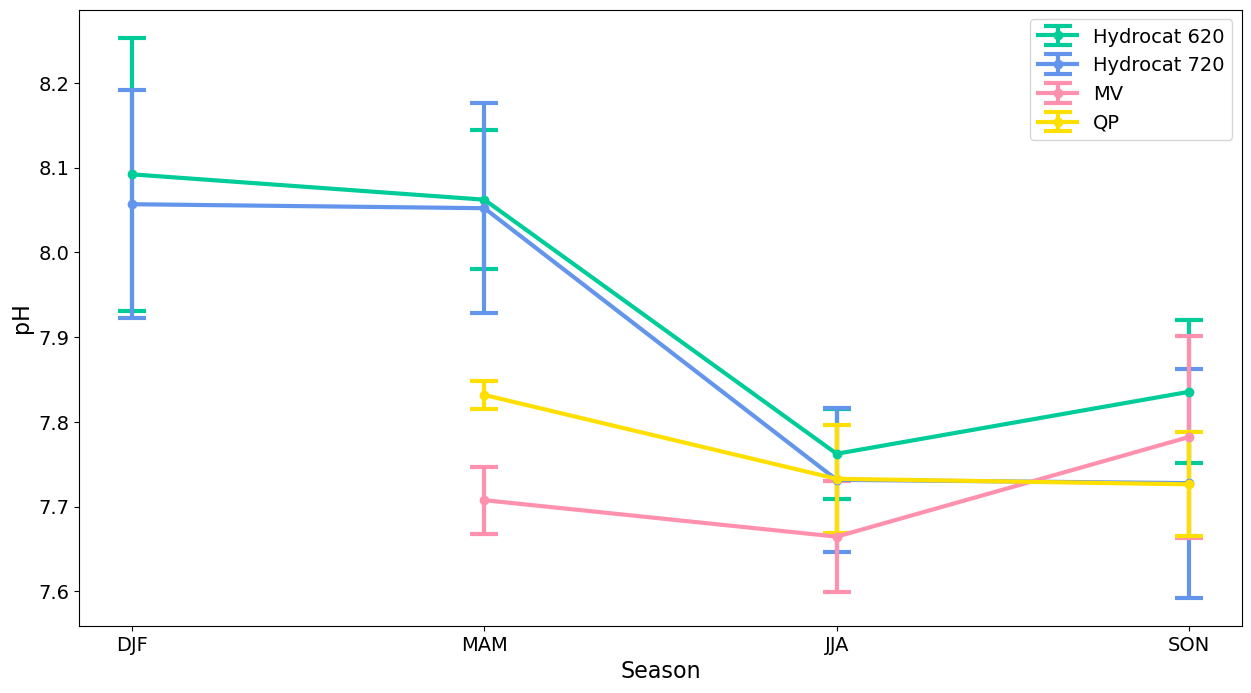

In [212]:
fig, ax = plt.subplots(figsize = [15,8])
months = np.arange(1,5,1)

d = 'Hydrocat 620'
ax.errorbar(months, pH_mn_s[d], yerr = pH_std_s[d], lw = 3,
           color = clr_hydro620, marker = 'o', capsize = 10, capthick = 3, label = d)

d = 'Hydrocat 720'
ax.errorbar(months, pH_mn_s[d], yerr = pH_std_s[d], lw = 3,
           color = clr_hydro720, marker = 'o', capsize = 10, capthick = 3, label = d)

d = 'MV'
ax.errorbar(months, pH_mn_s[d], yerr = pH_std_s[d], lw = 3,
           color = clr_MV, marker = 'o', capsize = 10, capthick = 3, label = d)

d = 'QP'
ax.errorbar(months, pH_mn_s[d], yerr = pH_std_s[d], lw = 3, 
           color = clr_QP, marker = 'o', capsize = 10, capthick = 3, label = d)

ax.set_xticks(months)
ax.set_xticklabels(['DJF','MAM','JJA','SON'], fontsize = 14)
ax.tick_params('y',labelsize = 14)
ax.set_ylabel('pH', fontsize = 16)
ax.set_xlabel('Season', fontsize = 16)
ax.legend(fontsize = 14)

fig.savefig('/Users/akbaskind/Documents/Python Scripts/phyto/seasonal_ph.png', bbox_inches='tight')

In [262]:
pH_std_s.iloc[0].mean()

0.1477820899742854

# DO month and seasonal average

In [78]:
mn = {'Hydrocat 620': [], 'Hydrocat 720': [], 'QP': [], 'MV': []}
std = {'Hydrocat 620': [], 'Hydrocat 720': [], 'QP': [], 'MV': []}

for m in hydrocat720['Month'].unique():
    M620 = hydrocat620.where(hydrocat620['Month']==m).dropna().mean()
    STD620 = hydrocat620.where(hydrocat620['Month']==m).dropna().std(ddof=1)
    
    M720 = hydrocat720.where(hydrocat720['Month']==m).dropna().mean()
    STD720 = hydrocat720.where(hydrocat720['Month']==m).dropna().std(ddof=1)
    
    Mmv = MV.where(MV['Month']==m).dropna().mean()
    STDmv = MV.where(MV['Month']==m).dropna().std(ddof=1)
    
    Mqp = QP.where(QP['Month']==m).dropna().mean()
    STDqp = QP.where(QP['Month']==m).dropna().std(ddof=1)
    
    var = 'DO [mg/L]'
    mn['Hydrocat 620'].append(M620[var])
    mn['Hydrocat 720'].append(M720[var])
    mn['QP'].append(Mqp[var])
    mn['MV'].append(Mmv[var])
    
    std['Hydrocat 620'].append(STD620[var])
    std['Hydrocat 720'].append(STD720[var])
    std['QP'].append(STDqp[var])
    std['MV'].append(STDmv[var])
    
DO_mn = pd.DataFrame(mn)
DO_std = pd.DataFrame(std)

In [79]:
mn_s = {'Hydrocat 620': [], 'Hydrocat 720': [], 'QP': [], 'MV': []}
std_s = {'Hydrocat 620': [], 'Hydrocat 720': [], 'QP': [], 'MV': []}

for m in hydrocat720['Season'].unique():
    M620 = hydrocat620.where(hydrocat620['Season']==m).dropna().mean()
    STD620 = hydrocat620.where(hydrocat620['Season']==m).dropna().std(ddof=1)
    
    M720 = hydrocat720.where(hydrocat720['Season']==m).dropna().mean()
    STD720 = hydrocat720.where(hydrocat720['Season']==m).dropna().std(ddof=1)
    
    Mmv = MV.where(MV['Season']==m).dropna().mean()
    STDmv = MV.where(MV['Season']==m).dropna().std(ddof=1)
    
    Mqp = QP.where(QP['Season']==m).dropna().mean()
    STDqp = QP.where(QP['Season']==m).dropna().std(ddof=1)
    
    var = 'DO [mg/L]'
    mn_s['Hydrocat 620'].append(M620[var])
    mn_s['Hydrocat 720'].append(M720[var])
    mn_s['QP'].append(Mqp[var])
    mn_s['MV'].append(Mmv[var])
    
    std_s['Hydrocat 620'].append(STD620[var])
    std_s['Hydrocat 720'].append(STD720[var])
    std_s['QP'].append(STDqp[var])
    std_s['MV'].append(STDmv[var])
    
DO_mn_s = pd.DataFrame(mn_s)
DO_std_s = pd.DataFrame(std_s)

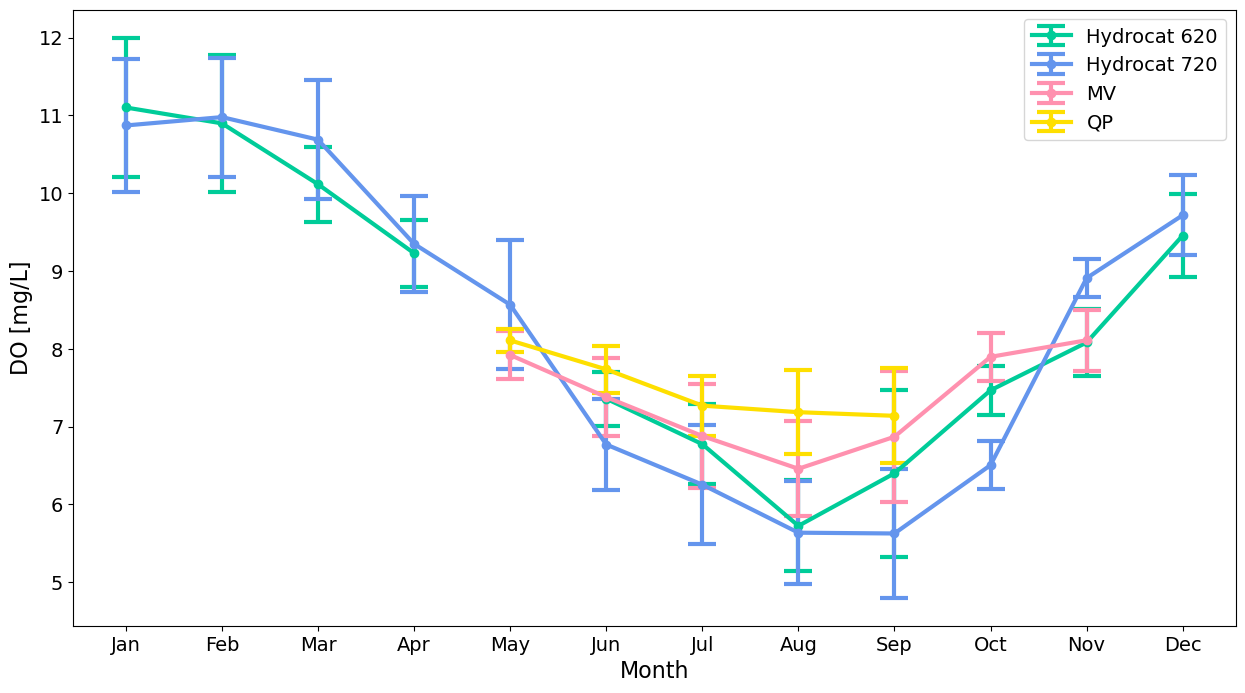

In [80]:
fig, ax = plt.subplots(figsize = [15,8])
months = np.arange(1,13,1)

d = 'Hydrocat 620'
ax.errorbar(months, DO_mn[d], yerr = DO_std[d], lw = 3,
           color = clr_hydro620, marker = 'o', capsize = 10, capthick = 3, label = d)

d = 'Hydrocat 720'
ax.errorbar(months, DO_mn[d], yerr = DO_std[d], lw = 3,
           color = clr_hydro720, marker = 'o', capsize = 10, capthick = 3, label = d)

d = 'MV'
ax.errorbar(months, DO_mn[d], yerr = DO_std[d], lw = 3,
           color = clr_MV, marker = 'o', capsize = 10, capthick = 3, label = d)

d = 'QP'
ax.errorbar(months, DO_mn[d], yerr = DO_std[d], lw = 3, 
           color = clr_QP, marker = 'o', capsize = 10, capthick = 3, label = d)

ax.set_xticks(months)
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontsize = 14)
ax.tick_params('y',labelsize = 14)
ax.set_ylabel('DO [mg/L]', fontsize = 16)
ax.set_xlabel('Month', fontsize = 16)
ax.legend(fontsize = 14)

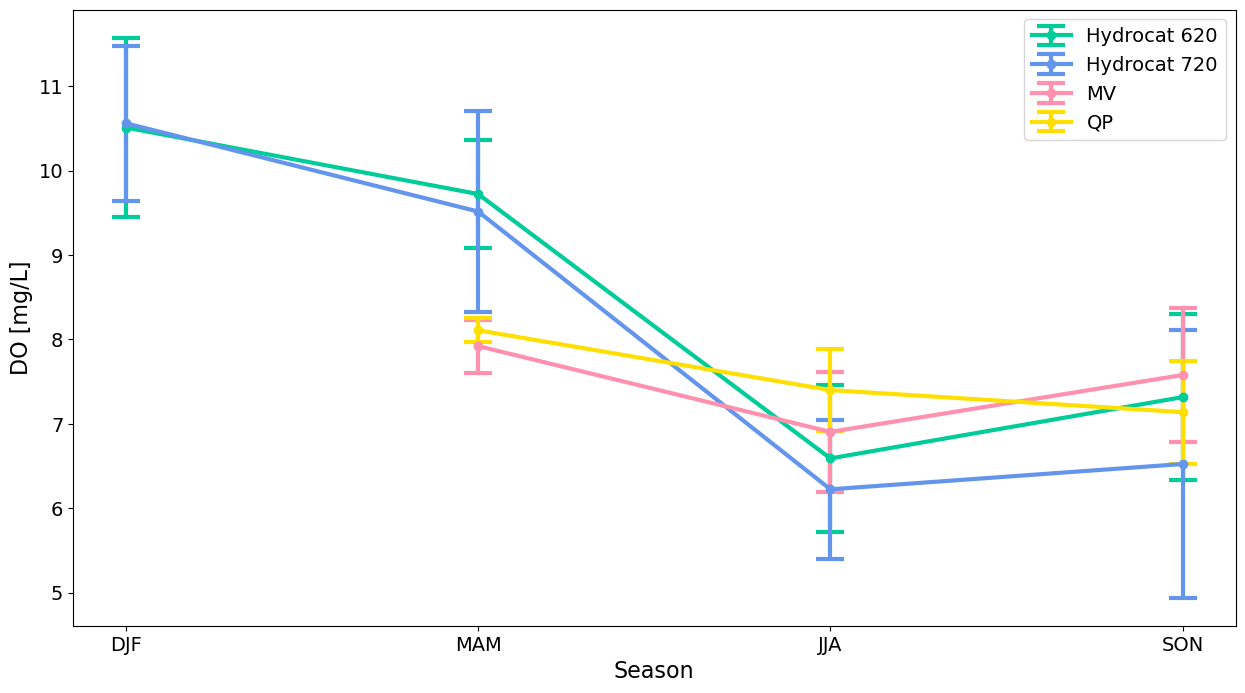

In [81]:
fig, ax = plt.subplots(figsize = [15,8])
months = np.arange(1,5,1)

d = 'Hydrocat 620'
ax.errorbar(months, DO_mn_s[d], yerr = DO_std_s[d], lw = 3,
           color = clr_hydro620, marker = 'o', capsize = 10, capthick = 3, label = d)

d = 'Hydrocat 720'
ax.errorbar(months, DO_mn_s[d], yerr = DO_std_s[d], lw = 3,
           color = clr_hydro720, marker = 'o', capsize = 10, capthick = 3, label = d)

d = 'MV'
ax.errorbar(months, DO_mn_s[d], yerr = DO_std_s[d], lw = 3,
           color = clr_MV, marker = 'o', capsize = 10, capthick = 3, label = d)

d = 'QP'
ax.errorbar(months, DO_mn_s[d], yerr = DO_std_s[d], lw = 3, 
           color = clr_QP, marker = 'o', capsize = 10, capthick = 3, label = d)

ax.set_xticks(months)
ax.set_xticklabels(['DJF','MAM','JJA','SON'], fontsize = 14)
ax.tick_params('y',labelsize = 14)
ax.set_ylabel('DO [mg/L]', fontsize = 16)
ax.set_xlabel('Season', fontsize = 16)
ax.legend(fontsize = 14)

In [229]:
pimenta = pd.read_csv('/Users/akbaskind/Desktop/Pimenta.csv')
pimenta

,Unnamed: 0,station,datetimeUTC,nomDate,DEP.m,layer,SAL.ppt,degC,DO.mg.L,DOpct,pH.nbs,dic.umkg.apollo,alk.both
0,745,BETS Station 4,2017-01-19 16:04:25,2017-01-19,1.0,surface,27.90,3.75,12.65,116.5,8.19,1767.74,1965.66
1,746,BETS Station 4,2017-01-19 16:04:25,2017-01-19,5.5,mid,30.24,3.82,12.06,112.1,8.12,1875.88,2070.31
2,747,BETS Station 4,2017-01-19 16:04:25,2017-01-19,10.5,bottom,30.92,4.05,11.40,107.1,8.06,1924.06,2099.20
3,748,BETS Station 5,2017-01-19 13:57:02,2017-01-19,1.0,surface,30.78,3.83,11.56,108.2,7.81,1912.19,2094.71
4,749,BETS Station 5,2017-01-19 13:57:02,2017-01-19,7.4,mid,31.64,4.47,11.03,105.3,7.79,1955.46,2120.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,1537,BETS Station 3,2019-11-20 15:25:00,2019-11-19,2.6,mid,29.02,7.57,9.26,93.6,7.84,1883.29,1980.25
760,1538,BETS Station 3,2019-11-20 15:25:00,2019-11-19,4.8,bottom,29.73,8.43,8.97,92.6,7.83,1897.92,1993.05
761,1545,BETS Station 6,2019-11-20 13:49:00,2019-11-19,1.0,surface,30.10,8.71,9.27,96.6,7.64,1940.22,2042.65
762,1546,BETS Station 6,2019-11-20 13:49:00,2019-11-19,5.3,mid,30.22,8.80,9.13,95.6,7.66,1922.42,2043.40


In [243]:
pimenta = pimenta.dropna()
P = pimenta.reset_index(drop = True)

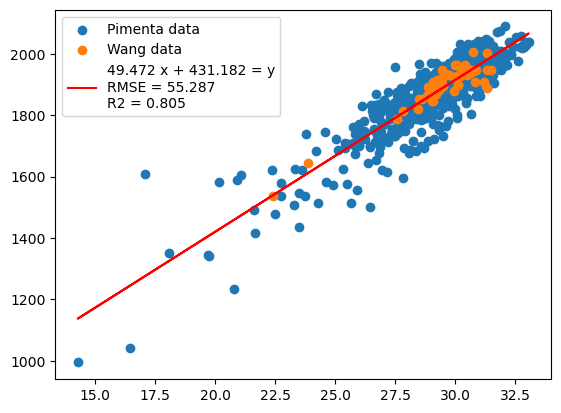

In [248]:
fig, ax = plt.subplots()
x = pd.DataFrame(P['SAL.ppt'].append(labdf['Salinity'],ignore_index = True)).to_numpy()

y = pd.DataFrame(P['dic.umkg.apollo'].append(labdf['DIC (umol/kg)'],ignore_index = True)).to_numpy()
# ax.scatter(x,y)
ax.scatter(pimenta['SAL.ppt'], pimenta['dic.umkg.apollo'], label = 'Pimenta data')
ax.scatter(labdf['Salinity'], labdf['DIC (umol/kg)'], label = 'Wang data')


    
x = x.reshape(-1,1)
regression_model = LinearRegression()
  

regression_model.fit(x, y)
  
# Predict
y_predicted = regression_model.predict(x)
  
# model evaluation
mse=mean_squared_error(y,y_predicted)
  
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
cff = "%.3f" % regression_model.coef_
intcpt = "%.3f" % regression_model.intercept_
RMSE = "%.3f" % rmse
R2 = "%.3f" % r2
    
lbl = cff + ' x + ' + intcpt + ' = y\nRMSE = ' + RMSE + '\nR2 = ' + R2
ax.plot(x, y_predicted, color = 'red', label = lbl)
ax.legend()

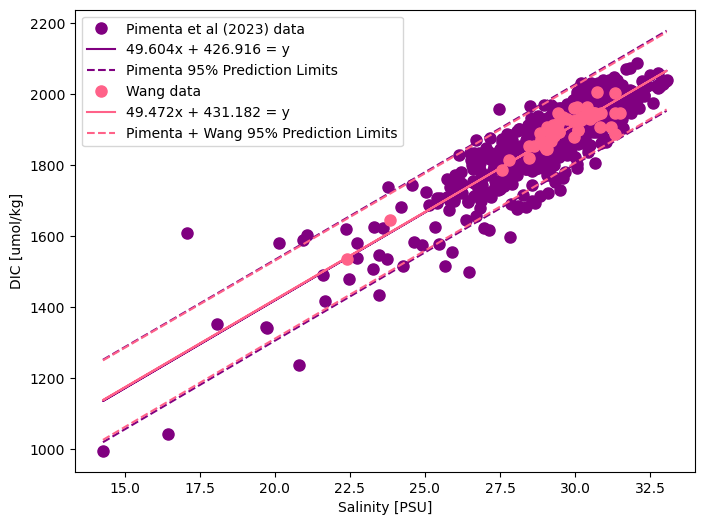

In [305]:
import scipy as sp
import scipy.stats as stats

def plot_ci_manual(t, s_err, n, x, x2, y2, ax=None):
    """Return an axes of confidence bands using a simple approach.
    
    Notes
    -----
    .. math:: \left| \: \hat{\mu}_{y|x0} - \mu_{y|x0} \: \right| \; \leq \; T_{n-2}^{.975} \; \hat{\sigma} \; \sqrt{\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n{(x_i-\bar{x})^2}}}
    .. math:: \hat{\sigma} = \sqrt{\sum_{i=1}^n{\frac{(y_i-\hat{y})^2}{n-2}}}
    
    References
    ----------
    .. [1] M. Duarte.  "Curve fitting," Jupyter Notebook.
       http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/CurveFitting.ipynb
    
    """
    if ax is None:
        ax = plt.gca()
    
    ci = t * s_err * np.sqrt(1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
    ax.fill_between(x2, y2 + ci, y2 - ci, color='green', edgecolor='green')

    return ax


def plot_ci_bootstrap(xs, ys, resid, nboot=500, ax=None):
    """Return an axes of confidence bands using a bootstrap approach.

    Notes
    -----
    The bootstrap approach iteratively resampling residuals.
    It plots `nboot` number of straight lines and outlines the shape of a band.
    The density of overlapping lines indicates improved confidence.

    Returns
    -------
    ax : axes
        - Cluster of lines
        - Upper and Lower bounds (high and low) (optional)  Note: sensitive to outliers

    References
    ----------
    .. [1] J. Stults. "Visualizing Confidence Intervals", Various Consequences.
       http://www.variousconsequences.com/2010/02/visualizing-confidence-intervals.html

    """ 
    if ax is None:
        ax = plt.gca()

    bootindex = sp.random.randint

    for _ in range(nboot):
        resamp_resid = resid[bootindex(0, len(resid) - 1, len(resid))]
        # Make coeffs of for polys
        pc = sp.polyfit(xs, ys + resamp_resid, 1)                   
        # Plot bootstrap cluster
        ax.plot(xs, sp.polyval(pc, xs), "b-", linewidth=2, alpha=3.0 / float(nboot))

    return ax

# Computations ----------------------------------------------------------------    
# Modeling with Numpy
def equation(a, b):
    """Return a 1D polynomial."""
    return np.polyval(a, b) 

# Pimenta data only ********************************************************************
heights = pimenta['SAL.ppt'].to_numpy()
weights = pimenta['dic.umkg.apollo'].to_numpy()
x = heights
y = weights
p, cov = np.polyfit(x, y, 1, cov=True)                     # parameters and covariance from of the fit of 1-D polynom.
y_model = equation(p, x)                                   # model using the fit parameters; NOTE: parameters here are coefficients
slp = "%.3f" % p[0]
intcpt = "%.3f" % p[1]
eq = slp + 'x + ' + intcpt + ' = y'

# Statistics
n = weights.size                                           # number of observations
m = p.size                                                 # number of parameters
dof = n - m                                                # degrees of freedom
t = stats.t.ppf(0.975, n - m)                              # t-statistic; used for CI and PI bands

# Estimates of Error in Data/Model
resid = y - y_model                                        # residuals; diff. actual data from predicted values
chi2 = np.sum((resid / y_model)**2)                        # chi-squared; estimates error in data
chi2_red = chi2 / dof                                      # reduced chi-squared; measures goodness of fit
s_err = np.sqrt(np.sum(resid**2) / dof)                    # standard deviation of the error

# Plotting --------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 6))

# Data
ax.plot(
    x, y, "o", color="purple", markersize=8, 
    markeredgewidth=1, markeredgecolor="purple", markerfacecolor="purple", label = 'Pimenta et al (2023) data'
)

# Fit
ax.plot(x, y_model, "-", color="purple", linewidth=1.5, label=eq)  

x2 = np.linspace(np.min(x), np.max(x), 100)
y2 = equation(p, x2)

# Confidence Interval (select one)
# plot_ci_manual(t, s_err, n, x, x2, y2, ax=ax)
#plot_ci_bootstrap(x, y, resid, ax=ax)
   
# Prediction Interval
pi = t * s_err * np.sqrt(1 + 1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))   
ax.fill_between(x2, y2 + pi, y2 - pi, color="None", linestyle="--")
ax.plot(x2, y2 - pi, "--", color="purple", label="Pimenta 95% Prediction Limits")
ax.plot(x2, y2 + pi, "--", color="purple")

# Wang + Pimenta ******************************************************

heights = pd.DataFrame(P['SAL.ppt'].append(labdf['Salinity'],ignore_index = True)).to_numpy()
weights = pd.DataFrame(P['dic.umkg.apollo'].append(labdf['DIC (umol/kg)'],ignore_index = True)).to_numpy()

x = heights[:,0]
y = weights[:,0]
p, cov = np.polyfit(x, y, 1, cov=True)                     # parameters and covariance from of the fit of 1-D polynom.
y_model = equation(p, x)                                   # model using the fit parameters; NOTE: parameters here are coefficients
slp = "%.3f" % p[0]
intcpt = "%.3f" % p[1]
eq = slp + 'x + ' + intcpt + ' = y'

# Statistics
n = weights.size                                           # number of observations
m = p.size                                                 # number of parameters
dof = n - m                                                # degrees of freedom
t = stats.t.ppf(0.975, n - m)                              # t-statistic; used for CI and PI bands

# Estimates of Error in Data/Model
resid = y - y_model                                        # residuals; diff. actual data from predicted values
chi2 = np.sum((resid / y_model)**2)                        # chi-squared; estimates error in data
chi2_red = chi2 / dof                                      # reduced chi-squared; measures goodness of fit
s_err = np.sqrt(np.sum(resid**2) / dof)                    # standard deviation of the error

# Data -- plotting only Wang data
ax.plot(
    labdf['Salinity'], labdf['DIC (umol/kg)'], "o", color=pink, markersize=8, 
    markeredgewidth=1, markeredgecolor=pink, markerfacecolor= pink, label = 'Wang data'
)

# Fit
ax.plot(x, y_model, "-", color=pink, linewidth=1.5, label=eq)  

x2 = np.linspace(np.min(x), np.max(x), 100)
y2 = equation(p, x2)

# Confidence Interval (select one)
# plot_ci_manual(t, s_err, n, x, x2, y2, ax=ax)
#plot_ci_bootstrap(x, y, resid, ax=ax)
   
# Prediction Interval
pi = t * s_err * np.sqrt(1 + 1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))   
ax.fill_between(x2, y2 + pi, y2 - pi, color="None", linestyle="--")
ax.plot(x2, y2 - pi, "--", color=pink, label="Pimenta + Wang 95% Prediction Limits")
ax.plot(x2, y2 + pi, "--", color=pink)
ax.set_ylabel('DIC [umol/kg]')
ax.set_xlabel('Salinity [PSU]')

ax.legend()

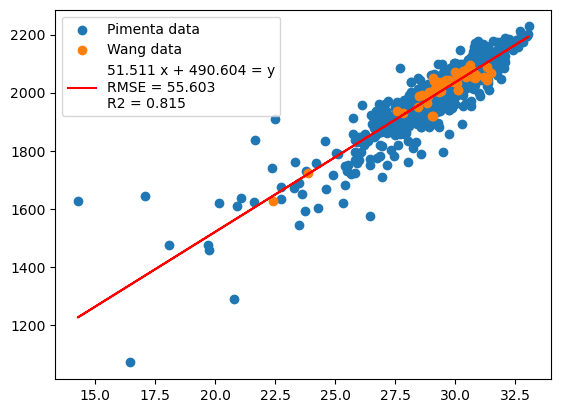

In [249]:
fig, ax = plt.subplots()
x = pd.DataFrame(P['SAL.ppt'].append(labdf['Salinity'],ignore_index = True)).to_numpy()

y = pd.DataFrame(P['alk.both'].append(labdf['TA (umol/kg)'],ignore_index = True)).to_numpy()
# ax.scatter(x,y)
ax.scatter(pimenta['SAL.ppt'], pimenta['alk.both'], label = 'Pimenta data')
ax.scatter(labdf['Salinity'], labdf['TA (umol/kg)'], label = 'Wang data')


    
x = x.reshape(-1,1)
regression_model = LinearRegression()
  

regression_model.fit(x, y)
  
# Predict
y_predicted = regression_model.predict(x)
  
# model evaluation
mse=mean_squared_error(y,y_predicted)
  
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
cff = "%.3f" % regression_model.coef_
intcpt = "%.3f" % regression_model.intercept_
RMSE = "%.3f" % rmse
R2 = "%.3f" % r2
    
lbl = cff + ' x + ' + intcpt + ' = y\nRMSE = ' + RMSE + '\nR2 = ' + R2
ax.plot(x, y_predicted, color = 'red', label = lbl)
ax.legend()

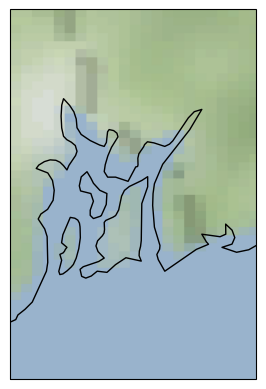

In [319]:
fig = plt.figure()
from cartopy.io.img_tiles import Stamen
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-71.5, -71, 41.25, 42], crs=ccrs.PlateCarree())
url = 'https://map1c.vis.earthdata.nasa.gov/wmts-geo/wmts.cgi'
layer = 'VIIRS_CityLights_2012'

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
tiler = Stamen('terrain-background')
mercator = tiler.crs
ax.add_image(tiler, 6)
